<a href="https://colab.research.google.com/github/karinmrsh18/Final-Data-Mining-Project-Group-6/blob/main/Project_Akhir_Data_Mining_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Text Analysis: Piala Dunia 2022**

**Kelompok 6 :**

1. Amanda Sarah Ivana - 1906375814
2. Hunaiva Kintan - 1906375695
3. Karin Marshanda - 1906299515
4. Rosyda Hanavania - 1906299566

**Link Google Colab**\
Code pada Google Colab dapat diakses pada link berikut: \
https://colab.research.google.com/drive/1nHPbNv3J12soZUc8cOzuQDvm7B4lxljH?usp=sharing

**Video Presentasi** \
Video presentasi dapat diakses pada link berikut:\
https://drive.google.com/file/d/1WSglT6R_Y5lY1kbIwpOJs98MwZiFXYOI/view?usp=sharing

# **Business Understanding**

Piala dunia merupakan event rutin yang dilaksanakan 4 tahun sekali dan diikuti oleh team sepak bola dari seluruh dunia. Setelah penantian 4 tahun tersebut, akhirnya pada tahun 2022 ini Piala Dunia kembali diselenggarakan. Oleh karena itu, kami akan melakukan analisis untuk melihat bagaimana perbincangan masyarakat Indonesia mengenai Piala Dunia 2022. Pengambilan data dilakukan lewat Twitter API dan dianalisis lebih lanjut dengan menggunakan Sentiment Analysis, Social Network Analysis, dan Latent Dirichlet Analysis. Hasil dari analisis ini, diharapkan bisa mendapatkan dan menginformasikan insight sebanyak-banyaknya mengenai data. 

# **Package and Modules**

In [ ]:
##Module and files needed##

print("Detecting environment: ", end=' ')
try:
    import google.colab
    IN_COLAB = True
    print("Running the code in Google Colab. Installing and downloading dependencies.\nPlease wait...")
    import nltk
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
    !pip install unidecode textblob sastrawi
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally.")

Detecting environment:  Running the code in Google Colab. Installing and downloading dependencies.
Please wait...
--2022-12-29 03:11:46--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5686 (5.6K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]   5.55K  --.-KB/s    in 0s      

2022-12-29 03:11:46 (59.7 MB/s) - ‘taudataNlpTm.py’ saved [5686/5686]

--2022-12-29 03:11:46--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
!pip install sastrawi
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'Done'

In [ ]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install nest_asyncio

import twint
import nest_asyncio
nest_asyncio.apply()
import pandas as pd

nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True
"Done"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-ahbowl3m
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-ahbowl3m
     |████████████████████████████████| 265 kB 4.6 MB/s 
     |████████████████████████████████| 385 kB 54.3 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 288 kB 72.9 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 59 kB 7.5 MB/s 
     |████████████████████████████████| 140 kB 56.6 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39180 sha256=92fa2959c26268b334074d0bb32bf9b14fdfc1f3fc886b8dee6b4cdc46dbd4c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-bg8jl365/wheels/de/66/ce/1d0e7f533048436bc24ec9d2d55bc759542faa4fe80bc0b9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'Done'

# **Crawling Data from Twitter (Steps)**

Data akan diambil melalui modul twint dan tiap run akan memberi hasil yang lebih update. Oleh karena itu, untuk konsistensi dalam perhitungan, data pertama yang kami peroleh akan kami simpan terlebih dahulu ke dalam bentuk csv lalu diimport kembali melalui github.


In [ ]:
# Config Tweet Search

config.Search = "piala dunia 2022 OR pildun 2022"
config.Limit = 11000

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)

In [ ]:
data.to_csv(r'data_tweet.csv', index=False, encoding='utf8')
"Done"

# **Import data hasil crawling**

Berikut adalah data yang didapatkan dari hasil pengaturan kata “piala dunia 2022” dan/atau “pildun 2022” dengan menggunakan pattern OR, dimana kami mengatur batasan minimal kalimat sebanyak 11000 yang mengandung salah satu atau kedua kata tersebut.

In [ ]:
# Importing CSV data from Github
import pandas as pd

url = 'https://raw.githubusercontent.com/karinmrsh18/Final-Data-Mining-Project-Group-6/main/data_final.csv'
data = pd.read_csv(url)

print(data.shape)
data.head()

(11009, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 22:17,0,NaN,https://t.co/QYQmx9xKNT Wasit Mengakui Sebua...,in,"['bandarbolaterbesar', 'bandarbolaterpecaya', ...",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 22:07,0,NaN,Liga Inggris paling cepat bergulir lagi usai j...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 22:03,0,NaN,Liga Inggris paling cepat bergulir lagi usai j...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 21:53,0,NaN,#news #berita #fakta #indonesia #viral #berita...,in,"['news', 'berita', 'fakta', 'indonesia', 'vira...",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 21:33,0,NaN,Andres Iniesta memuji keberhasilan Lionel Mess...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Data hasil crawling di atas didefinisikan sebagai **`data`**

# **Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11009 non-null  float64
 1   conversation_id  11009 non-null  float64
 2   created_at       11009 non-null  float64
 3   date             11009 non-null  object 
 4   timezone         11009 non-null  int64  
 5   place            11 non-null     object 
 6   tweet            11009 non-null  object 
 7   language         11009 non-null  object 
 8   hashtags         11009 non-null  object 
 9   cashtags         11009 non-null  object 
 10  user_id          11009 non-null  float64
 11  user_id_str      11009 non-null  float64
 12  username         11009 non-null  object 
 13  name             11009 non-null  object 
 14  day              11009 non-null  int64  
 15  hour             11009 non-null  int64  
 16  link             11009 non-null  object 
 17  urls        

In [ ]:
print('Variabel dengan tipe data object:')
print(list(data.select_dtypes(include= 'object')))

Variabel dengan tipe data object:
['date', 'place', 'tweet', 'language', 'hashtags', 'cashtags', 'username', 'name', 'link', 'urls', 'photos', 'thumbnail', 'quote_url', 'search', 'reply_to']


In [ ]:
print('Variabel dengan tipe data float:')
print(list(data.select_dtypes(include= 'float64')))

Variabel dengan tipe data float:
['id', 'conversation_id', 'created_at', 'user_id', 'user_id_str', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest']


In [ ]:
print('Variabel dengan tipe data integer:')
print(list(data.select_dtypes(include= 'int64')))

Variabel dengan tipe data integer:
['timezone', 'day', 'hour', 'video', 'nlikes', 'nreplies', 'nretweets']


In [ ]:
print('Variabel dengan tipe data boolean:')
print(list(data.select_dtypes(include= 'bool')))

Variabel dengan tipe data boolean:
['retweet']


In [ ]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Keterangan setiap variabel:**
 
* **`id`** : Kode unik tweet
* **`conversation_id`** : Kode unik tweet yang ada pada reply thread
* **`created_at`** : Waktu UTC saat tweet dibuat
* **`date`** : Tanggal tweet dibuat
* **`timezone`** : Zona waktu tweet
* **`place`** : Tempat tweet dibuat
* **`tweet`** : Isi tweet
* **`language`** : Bahasa yang digunakan dalam tweet
* **`hashtags`** : Hashtag yang digunakan dalam tweet
* **`cashtags`** : Melihat semua tweet lain yang menyertakannya
* **`user_id`** : Kode unik user
* **`user_id_str`** : Kode unik user dalam string
* **`username`** : Username yang membuat tweet
* **`name`** : Nama user yang membuat tweet
* **`day`** : Hari tweet dibuat
* **`hour`** : Waktu dalam jam tweet dibuat
* **`link`** : Tautan tweet
* **`urls`** : Tautan yang ada pada tweet
* **`photos`** : Foto yang ada pada tweet
* **`video`** : Apakah tweet terdapat video atau tidak
* **`thumbnail`** : Foto tampilan depan tweet 
* **`retweet`** : Apakah tweet tersebut berbentuk retweet atau tidak
* **`nlikes`** : Jumlah like pada tweet
* **`nreplies`** : Jumlah reply pada tweet
* **`nretweets`** : Jumlah retweet pada tweet
* **`quote_url`** : Tautan quote tweet pada tweet
* **`search`** : search yang digunakan dalam pengambilan data (dalam kasus ini adalah piala dunia 2022 atau pildun 2022)
* **`near`** : NaN
* **`geo`** : NaN
* **`source`** : NaN
* **`user_rt_id`** : NaN
* **`user_rt`** : NaN
* **`retweet_id`** : NaN
* **`reply_to`** : Nama user yang di reply oleh tweet
* **`retweet_date`** : NaN
* **`translate`** : NaN
* **`trans_src`** : NaN
* **`trans_dest`** : NaN

# **Preprocessing Data**

In [ ]:
#Data Tweet

df = data[['tweet']]
df.head()

,tweet
0,https://t.co/QYQmx9xKNT Wasit Mengakui Sebua...
1,Liga Inggris paling cepat bergulir lagi usai j...
2,Liga Inggris paling cepat bergulir lagi usai j...
3,#news #berita #fakta #indonesia #viral #berita...
4,Andres Iniesta memuji keberhasilan Lionel Mess...


Untuk menormalisasi teks, akan digunakan dictionary yang berisi kumpulan slang. Dictionary tersebut disimpan di folder data localhost, lalu didefinisikan sebagai `slangS`. Kami juga menambahkan beberapa kata slang yang sering muncul pada saat piala dunia (seperti pildun = piala dunia, arg = argentina, fra = france) agar kata tersebut tetap masuk ke dalam pengolahan data.





In [ ]:
# Loading Slang dan Singkatan dari File
# Contoh memuat word fix melalui import file. 
dfslang =open('data/slang.txt',"r",encoding="utf-8", errors='replace')
slangS = dfslang.readlines() ; dfslang.close()
slangS = [t.split(":") for t in slangS]
slangS = [[k.strip(), v.strip()] for k,v in slangS]
slangS = {k:v for k,v in slangS}
#Menambahkan dictionary baru ke dalam slangS
D = {'pildun':'piala dunia', 'arg':'argentina', 'fra':'prancis', 'cr7':'ronaldo'}
slangS.update(D)
print(slangS['pildun'])

piala dunia


Dibawah ini akan digunakan StopWords Sastrawi, tujuannya adalah untuk menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, sehingga kami dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
# Stop Words
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Akan didefinisikan sebuah fungsi yang bertujuan untuk membersihkan data tweet secara keseluruhan, dimana pengaplikasiannya akan mengubah semua huruf menjadi lowercase, menghapus kata yang tidak perlu (dari StopWords), menghapus url, menghapus karakter yang bukan huruf, tokenisasi, serta menormalisasikan kata slang.

In [ ]:
## Cleaning Data

def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi 
    for i,t in enumerate(Tokens):
      if t in slangS.keys():
        Tokens[i] = slangS[t]
    docx = ' '.join(Tokens)
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx

In [ ]:
#apply to data

df['clean_tweet'] = '' # inititate kolom kosong
for idx, post in tqdm(df.iterrows()):
    df.at[idx, 'clean_tweet'] = cleanText(post.tweet)

In [ ]:
df.to_csv(r'clean_tweet.csv', index=False, encoding='utf8')
"Done"

'Done'

Tweet yang sudah bersih akan dimasukkan ke dalam kolom `clean_tweet` lalu digabungkan bersama dengan kolom data lainnya. Setelah melakukan preprocessing data, data akan disimpan ke dalam bentuk csv lalu diimport kembali melalui github untuk diolah agar perhitungan yang dilakukan tetap konsisten, data tersebut didefinisikan sebagai `df`.

In [ ]:
# Importing CSV data from Github
import pandas as pd

url = 'https://raw.githubusercontent.com/karinmrsh18/Final-Data-Mining-Project-Group-6/main/clean_tweet.csv'
df = pd.read_csv(url)

df.head(10)

,tweet,clean_tweet
0,https://t.co/QYQmx9xKNT Wasit Mengakui Sebua...,wasit aku buah salah buat final piala dunia 20...
1,Liga Inggris paling cepat bergulir lagi usai j...,liga inggris paling cepat gulir usai jeda pial...
2,Liga Inggris paling cepat bergulir lagi usai j...,liga inggris paling cepat gulir usai jeda pial...
3,#news #berita #fakta #indonesia #viral #berita...,news berita fakta indonesia viral beritaterkin...
4,Andres Iniesta memuji keberhasilan Lionel Mess...,andres iniesta puji hasil lionel messi menang ...
5,Andres Iniesta memuji keberhasilan Lionel Mess...,andres iniesta puji hasil lionel messi menang ...
6,Andres Iniesta memuji keberhasilan Lionel Mess...,andres iniesta puji hasil lionel messi menang ...
7,Antonio Conte Murka Liga Inggris 2022-2023 Ber...,antonio conte murka liga inggris 2022 2023 gul...
8,Bocoran SLOT GACOR SPECIAL HARI NATAL! Dijamin...,bocor slot gacor special hari natal jamin anti...
9,#news #berita #fakta #indonesia #viral #berita...,news berita fakta indonesia viral beritaterkin...


# **Data Final**

Pada di bawah ini, kolom `clean_tweet` di **df** akan dimasukkan ke dalam **data**.

In [ ]:
data['clean_tweet'] = df['clean_tweet']

data.head(5)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet
0,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 22:17,0,NaN,https://t.co/QYQmx9xKNT Wasit Mengakui Sebua...,in,"['bandarbolaterbesar', 'bandarbolaterpecaya', ...",[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,wasit aku buah salah buat final piala dunia 20...
1,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 22:07,0,NaN,Liga Inggris paling cepat bergulir lagi usai j...,in,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,liga inggris paling cepat gulir usai jeda pial...
2,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 22:03,0,NaN,Liga Inggris paling cepat bergulir lagi usai j...,in,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,liga inggris paling cepat gulir usai jeda pial...
3,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 21:53,0,NaN,#news #berita #fakta #indonesia #viral #berita...,in,"['news', 'berita', 'fakta', 'indonesia', 'vira...",[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,news berita fakta indonesia viral beritaterkin...
4,1.610000e+18,1.610000e+18,1.670000e+12,12/25/2022 21:33,0,NaN,Andres Iniesta memuji keberhasilan Lionel Mess...,in,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,andres iniesta puji hasil lionel messi menang ...


Setelah itu, data yang sudah lengkap akan kembali di export ke dalam bentuk CSV dan di upload ke Github untuk keperluan proses analisis selanjutnya.

In [ ]:
data.to_csv(r'clean_data.csv', index=False, encoding='utf8')
"Done"

'Done'

# **EDA**

Variabel-variabel yang akan digunakan kami gunakan untuk EDA di antaranya `date`, `username`, `name`, `clean_tweet`, `hashtags`, `nlikes`,`nreplies`, `nretweets`. Variabel yang ditinjau masih dapat ditambah apabila dirasa perlu.

In [ ]:
data_eda = data[['date','username','name','clean_tweet', 'hashtags','nlikes','nreplies','nretweets']]
data_eda.head(10)

,date,username,name,clean_tweet,hashtags,nlikes,nreplies,nretweets
0,12/25/2022 22:17,BandarBolaTop,Liga Top,wasit aku buah salah buat final piala dunia 20...,"['bandarbolaterbesar', 'bandarbolaterpecaya', ...",1,0,0
1,12/25/2022 22:07,tauberitamedia,tauberita,liga inggris paling cepat gulir usai jeda pial...,[],0,0,0
2,12/25/2022 22:03,detiksport,detiksport,liga inggris paling cepat gulir usai jeda pial...,[],0,0,0
3,12/25/2022 21:53,harus_kamutahu,Harus kamu tahu,news berita fakta indonesia viral beritaterkin...,"['news', 'berita', 'fakta', 'indonesia', 'vira...",0,0,0
4,12/25/2022 21:33,detiksport,detiksport,andres iniesta puji hasil lionel messi menang ...,[],1,0,0
5,12/25/2022 21:17,detikcom,detikcom,andres iniesta puji hasil lionel messi menang ...,[],7,0,1
6,12/25/2022 21:02,tauberitamedia,tauberita,andres iniesta puji hasil lionel messi menang ...,[],0,0,0
7,12/25/2022 20:41,okezonenews,Okezone,antonio conte murka liga inggris 2022 2023 gul...,"['lengkapcepatberitanya', 'bola', 'sepakbola',...",0,0,0
8,12/25/2022 20:39,hobi4d3,hobi4d,bocor slot gacor special hari natal jamin anti...,"['slotgacor', 'slotgames', 'slotgacorindonesia...",0,1,0
9,12/25/2022 19:55,rikagami1,rika gami,news berita fakta indonesia viral beritaterkin...,"['news', 'berita', 'fakta', 'indonesia', 'vira...",0,0,0


## **Visualisasi kata yang paling sering muncul**

In [ ]:
from collections import Counter
data_eda['temp_list'] = data_eda['clean_tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data_eda['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,dunia,12243
1,piala,12086
2,2022,11676
3,argentina,6554
4,juara,3923
5,messi,3698
6,final,2756
7,qatar,2342
8,prancis,2062
9,jadi,1752


In [ ]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

**Visualisasi dengan bantuan VOYANT**

![picture](https://drive.google.com/uc?export=view&id=14I5S_P72OYxMppOeFGTp5NyU6IUsFpZ2)

**Kata yang sering muncul selain piala dunia 2022**



![picture](https://drive.google.com/uc?export=view&id=1wE0bAPCCKo2C5PGLOf3QbLSMStp15K_a)

Pada visualisasi, semakin besar font maka semakin sering kata tersebut muncul. Terlihat bahwa kata-kata yang sering muncul di antaranya ada “piala”, “dunia”, “2022”. Dikarenakan konteks pembahasan kami adalah terkait piala dunia 2022, maka tentu saja kata tersebut akan sering muncul. Oleh karena itu, akan dihapus kata kunci “piala”, “dunia”, dan “2022” untuk melihat hasil lain. Setelah penghapusan kata tersebut, didapat yang paling sering muncul adalah "argentina", "juara", dan "messi". Hal ini menunjukkan Messi dan timnas Argentina sebagai pemenang Piala Dunia 2022 merupakan kata yang paling banyak diperbincangkan.

## **Engagement**

### **Berdasarkan Likes**

Akan dibentuk dataframe baru dengan mengelompokkan jumlah like berdasarkan username:

In [ ]:
dflikes = data_eda.groupby('username')['nlikes'].sum()

dflikes.head()

username
03___nakula        30
04Iqbalramadhan     0
0709Kodim           0
0xChamay979_        0
0xigyn_O2           0
Name: nlikes, dtype: int64

In [ ]:
dflikes = pd.DataFrame(dflikes)
dflikes.head()

,nlikes
username,
03___nakula,30
04Iqbalramadhan,0
0709Kodim,0
0xChamay979_,0
0xigyn_O2,0


In [ ]:
dflikessort = dflikes.sort_values('nlikes', ascending=False)

Berikut adalah top 20 username dengan jumlah likes terbanyak:

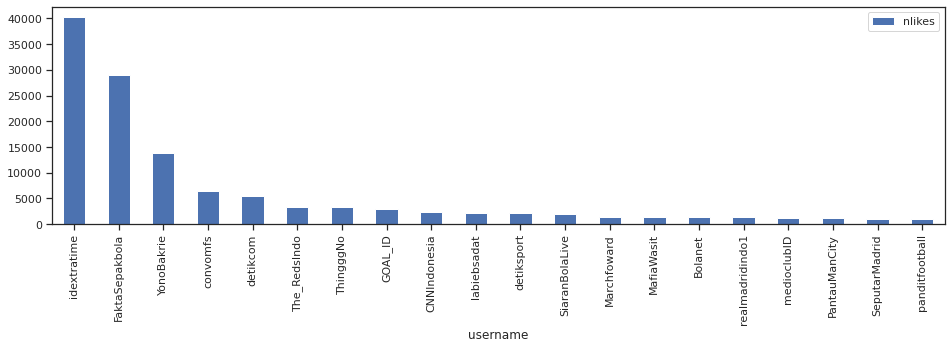

In [ ]:
top20 = dflikessort.head(20)
top20.plot(kind='bar', figsize=(16,4))

In [ ]:
dflikessort.head(20)

,nlikes
username,
idextratime,40283
FaktaSepakbola,28965
YonoBakrie,13799
convomfs,6442
detikcom,5447
The_RedsIndo,3353
ThingggNo,3290
GOAL_ID,2994
CNNIndonesia,2319


### **Berdasarkan Replies**

Akan dibentuk dataframe baru dengan mengelompokkan jumlah reply berdasarkan username:

In [ ]:
dfreplies = data_eda.groupby('username')['nreplies'].sum()

dfreplies.head()

username
03___nakula        6
04Iqbalramadhan    0
0709Kodim          0
0xChamay979_       0
0xigyn_O2          1
Name: nreplies, dtype: int64

In [ ]:
dfreplies = pd.DataFrame(dfreplies)
dfreplies.head()

,nreplies
username,
03___nakula,6
04Iqbalramadhan,0
0709Kodim,0
0xChamay979_,0
0xigyn_O2,1


In [ ]:
dfrepsort = dfreplies.sort_values('nreplies', ascending=False)

Berikut adalah top 20 username dengan jumlah reply terbanyak:

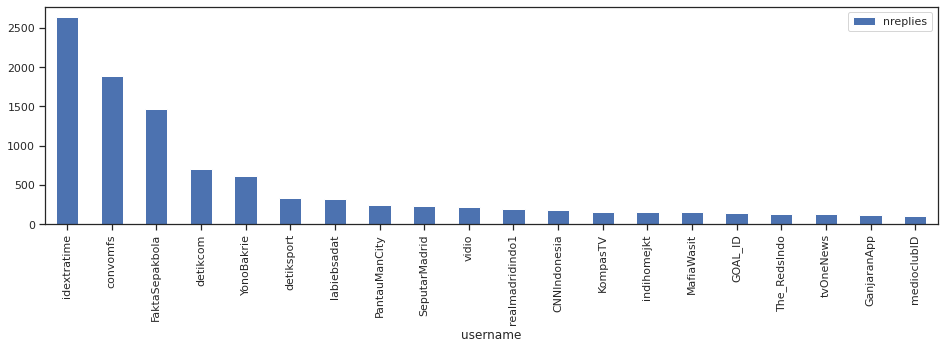

In [ ]:
top20 = dfrepsort.head(20)
top20.plot(kind='bar', figsize=(16,4))

In [ ]:
dfrepsort.head(20)

,nreplies
username,
idextratime,2637
convomfs,1884
FaktaSepakbola,1461
detikcom,696
YonoBakrie,615
detiksport,333
labiebsadat,321
PantauManCity,238
SeputarMadrid,232


### **Berdasarkan Retweets**

Akan dibentuk dataframe baru dengan mengelompokkan jumlah retweet berdasarkan username:

In [ ]:
dfretweets = data_eda.groupby('username')['nretweets'].sum()

dfretweets.head()

username
03___nakula        3
04Iqbalramadhan    0
0709Kodim          0
0xChamay979_       0
0xigyn_O2          0
Name: nretweets, dtype: int64

In [ ]:
dfretweets = pd.DataFrame(dfretweets)
dfretweets.head()

,nretweets
username,
03___nakula,3
04Iqbalramadhan,0
0709Kodim,0
0xChamay979_,0
0xigyn_O2,0


In [ ]:
dfrtsort = dfretweets.sort_values('nretweets', ascending=False)

Berikut adalah top 20 username dengan jumlah retweet terbanyak:

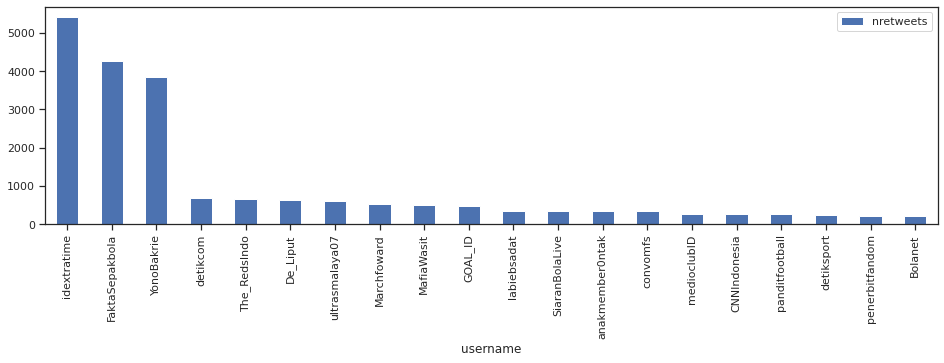

In [ ]:
top20 = dfrtsort.head(20)
top20.plot(kind='bar', figsize=(16,4))

In [ ]:
dfrtsort.head(20)

,nretweets
username,
idextratime,5415
FaktaSepakbola,4264
YonoBakrie,3850
detikcom,681
The_RedsIndo,643
De_Liput,629
ultrasmalaya07,615
Marchfoward,525
MafiaWasit,509


## **User dengan tweet terbanyak**

In [ ]:
!pip install dataclasses
from dataclasses import dataclass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = data[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(data))
    g = sns.countplot(data[feature], order = data[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height),
                ha="center") 

    plt.title('{} yang mengirim tweet terbanyak tentang Piala Dunia 2022'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

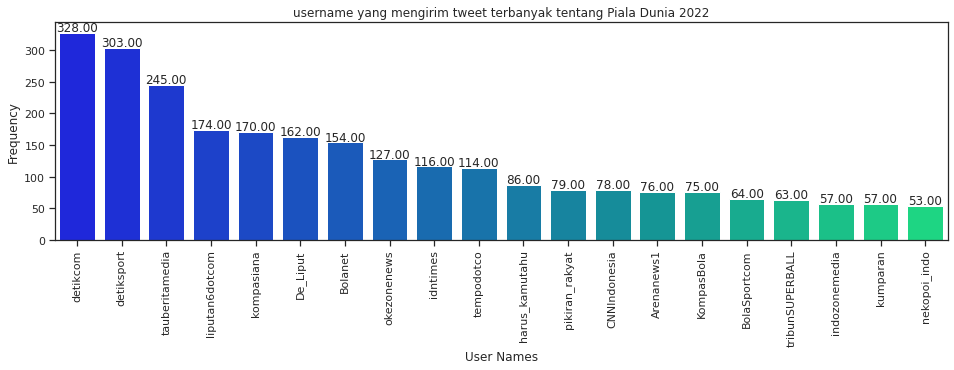

In [ ]:
plot_frequency_charts(data, 'username', 'User Names', 'winter')

Dari gambar di atas, terlihat bahwa username-username yang muncul pada grafik berasal dari akun resmi editorial. Sehingga dapat kita simpulkan bahwa banyak tweet tentang piala dunia yang merupakan rekapan hasil berita acara.

In [ ]:
# Converting our date and time column to datetime
data_eda['date'] = pd.to_datetime(data_eda['date'])
print(data_eda['date'].dtype)

datetime64[ns]


In [ ]:
data_eda['Dates'] = pd.to_datetime(data_eda['date']).dt.date
data_eda['Time'] = pd.to_datetime(data_eda['date']).dt.time

In [ ]:
data_eda['Dates'] = pd.to_datetime(data_eda['Dates'])
data_eda['Time'] = pd.to_datetime(data_eda['Dates'])

In [ ]:
print(data_eda['Dates'].dtype)
print(data_eda['Time'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
data_eda.head()

,date,username,name,clean_tweet,hashtags,nlikes,nreplies,nretweets,temp_list,Dates,Time
0,2022-12-25 22:17:00,BandarBolaTop,Liga Top,wasit aku buah salah buat final piala dunia 20...,"['bandarbolaterbesar', 'bandarbolaterpecaya', ...",1,0,0,"[wasit, aku, buah, salah, buat, final, piala, ...",2022-12-25,2022-12-25
1,2022-12-25 22:07:00,tauberitamedia,tauberita,liga inggris paling cepat gulir usai jeda pial...,[],0,0,0,"[liga, inggris, paling, cepat, gulir, usai, je...",2022-12-25,2022-12-25
2,2022-12-25 22:03:00,detiksport,detiksport,liga inggris paling cepat gulir usai jeda pial...,[],0,0,0,"[liga, inggris, paling, cepat, gulir, usai, je...",2022-12-25,2022-12-25
3,2022-12-25 21:53:00,harus_kamutahu,Harus kamu tahu,news berita fakta indonesia viral beritaterkin...,"['news', 'berita', 'fakta', 'indonesia', 'vira...",0,0,0,"[news, berita, fakta, indonesia, viral, berita...",2022-12-25,2022-12-25
4,2022-12-25 21:33:00,detiksport,detiksport,andres iniesta puji hasil lionel messi menang ...,[],1,0,0,"[andres, iniesta, puji, hasil, lionel, messi, ...",2022-12-25,2022-12-25


## **Tweet berdasarkan tanggal**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go
%matplotlib inline

from plotly.offline import download_plotlyjs, plot, init_notebook_mode, iplot

In [ ]:
data_eda.set_index(data_eda.Dates, inplace=True)
data_eda.index

DatetimeIndex(['2022-12-25', '2022-12-25', '2022-12-25', '2022-12-25',
               '2022-12-25', '2022-12-25', '2022-12-25', '2022-12-25',
               '2022-12-25', '2022-12-25',
               ...
               '2022-12-18', '2022-12-18', '2022-12-18', '2022-12-18',
               '2022-12-18', '2022-12-18', '2022-12-18', '2022-12-18',
               '2022-12-18', '2022-12-18'],
              dtype='datetime64[ns]', name='Dates', length=11009, freq=None)

In [ ]:
datecount_data = data_eda.index.value_counts()
datecount_data.sort_index(inplace=True)
datecount_data

2022-12-18    3424
2022-12-19    3590
2022-12-20    1422
2022-12-21     886
2022-12-22     582
2022-12-23     452
2022-12-24     393
2022-12-25     260
Name: Dates, dtype: int64

Note : terlihat bahwa seluruh data tweet yang diambil merupakan tweet yang dipublikasikan dari tanggal 18 Desember sampai 25 Desember tahun 2022.

In [ ]:
trace1 = go.Scatter(x=datecount_data.index, y=datecount_data)
fig = go.Figure(data=[trace1])

fig.update_xaxes(title="Day")
fig.update_yaxes(title="Tweet Count")

iplot(fig)

Dari hasil plot di atas, terlihat bahwa tweet topik piala dunia 2022 terbanyak muncul pada tanggal 19 Desember 2022. Dimana tanggal tersebut merupakan satu hari setelah final piala dunia 2022 terselenggara.

# **Sentiment Analysis**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_sent = data[['date','username','clean_tweet']]

In [ ]:
list1 = []
for i in df_sent['clean_tweet']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

In [ ]:
df_sent['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df_sent['sentiment_category'] = df_sent['sentiment'].apply(sentiment_category)

In [ ]:
df_sent.head()

,date,username,clean_tweet,sentiment,sentiment_category
0,12/25/2022 22:17,BandarBolaTop,wasit aku buah salah buat final piala dunia 20...,0.0000,neutral
1,12/25/2022 22:07,tauberitamedia,liga inggris paling cepat gulir usai jeda pial...,0.0000,neutral
2,12/25/2022 22:03,detiksport,liga inggris paling cepat gulir usai jeda pial...,0.0000,neutral
3,12/25/2022 21:53,harus_kamutahu,news berita fakta indonesia viral beritaterkin...,0.0000,neutral
4,12/25/2022 21:33,detiksport,andres iniesta puji hasil lionel messi menang ...,0.6369,positive


In [ ]:
pos = df_sent['sentiment_category'].value_counts()['positive']
neg = df_sent['sentiment_category'].value_counts()['negative']
neu = df_sent['sentiment_category'].value_counts()['neutral']

print("Positive =", pos)
print("Negative =", neg)
print("Neutral =", neu)

Positive = 1124
Negative = 229
Neutral = 9656


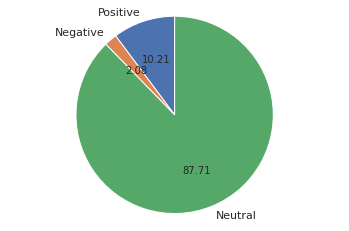

In [ ]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

Dari sentiment analysis yang telah dilakukan, didapatkan kesimpulan bahwa kebanyakan pengguna twitter yaitu sebanyak 87.71% dari data merasa netral mengenai Piala Dunia 2022.

# **Social Network Analysis**

In [ ]:
!pip install scipy==1.8.0
import networkx as nx
import re

seed = 0
np.random.seed(seed)
"Done"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.6 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


'Done'

In [ ]:
users = data.username.to_list()
tweets = data.tweet.to_list()
print( users[:7] )

['BandarBolaTop', 'tauberitamedia', 'detiksport', 'harus_kamutahu', 'detiksport', 'detikcom', 'tauberitamedia']


In [ ]:
G = nx.Graph() # Graph Kosong Baru

G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  4207
Banyak Edges =  0


In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  4719
Banyak Edges =  1089


In [ ]:
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "pildun2022.gexf")

Export ke GexF untuk di import ke Gephi


Untuk visualisasi yang lebih jelas dan menarik, akan dibuat visualisasi dengan *modularity* yang diwakili oleh perbedaan warna dan penggunaan skor *between centrality* yang diwakili oleh ukuran *font*.

**Visualisasi menggunakan Gephi**

![picture](https://drive.google.com/uc?export=view&id=1JIhcLHEYS-KDRRWX3aRlFmxmDt-GsJCW)

Pada visualisasi di atas, terdapat tiga klaster besar yang terbentuk, yakni idextratime, Youtube, dan FIFAWorldCup. *Node* idextreatime memiliki ukuran  paling besar dan juga memiliki *degree centrality* (jumlah *edges*) paling banyak di antara *node* lain,  besarnya *node* tersebut artinya memiliki skor *between centrality* yang tinggi dimana itu menandakan *username* idextratime mempunyai peran yang besar dalam luasnya penyebaran informasi terkait piala dunia, sedangkan banyaknya *degree centrality* (jumlah *edge*) yang terkoneksi pada suatu node mewakili interaksi.

**Interpretasi Cluster Terbesar:**

- **Cluster Merah:** Mewakili interaksi fans sepak bola
- **Cluster Orange:** Mewakili interaksi media, public figure, dan politik
- **Cluster Biru:** Mewakili kata kunci yang sering digunakan dalam 1 tweet

# **Topic Modelling**

In [ ]:
# Importing Modules
!pip install pyLDAvis
import taudataNlpTm as tau, itertools, re, pickle, pyLDAvis, pyLDAvis.sklearn, spacy, urllib.request
from tqdm import tqdm
from nltk.tag import CRFTagger
import gensim
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups

pyLDAvis.enable_notebook()
sns.set(style="ticks", color_codes=True)
random_state = 99
'Done'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=073b8855a082f9c9c26e229b7c87d5243ed9e55fe3c7295353c031cb1fb4f2f5
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=47b8908e2257167abdd387978dec701a8005fe31c91980ac3a34e8231007f949
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



'Done'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer()

data_tm = data['clean_tweet'].copy()
tf = tf_vectorizer.fit_transform(data_tm)
tf_terms = tf_vectorizer.get_feature_names()

tf.shape

(11009, 10417)

In [ ]:
col = data.columns
print("Kolom di data: ", col)
data_lda = data[col[-1]].values
data_lda[:5]

Kolom di data:  Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'clean_tweet'],
      dtype='object')


array(['wasit aku buah salah buat final piala dunia 2022 bandarbolaterbesar bandarbolaterpecaya bandarbolasbobet bandarbolanews infobandarbola seputarbandarbola bandarbolaibcbet bandarbolamedan',
       'liga inggris paling cepat gulir usai jeda piala dunia 2022 bikin kesal manajer tottenham hotspur antonio conte',
       'liga inggris paling cepat gulir usai jeda piala dunia 2022 bikin kesal manajer tottenham hotspur antonio conte',
       'news berita fakta indonesia viral beritaterkini arti maskot piala dunia 2022',
       'andres iniesta puji hasil lionel messi menang piala dunia 2022 lah pulga aku pantas sandang titel the greatest all time goat'],
      dtype=object)

In [ ]:
from spacy.lang.id import Indonesian
from nltk.tag import CRFTagger
nlp_id = Indonesian()  # Language Model

def NLPfilter(t, filters):
    tokens = nlp_id(t)
    tokens = [str(k) for k in tokens if len(k)>2]
    hasil = ct.tag_sents([tokens])
    return [k[0] for k in hasil[0] if k[1] in filters]

filters = set(['NN', 'NNP', 'NNS', 'NNPS', 'JJ'])
data_postTag = []
try:
    nlp_id = Indonesian()  # Language Model
    ct = CRFTagger()
    ct.set_model_file('data/all_indo_man_tag_corpus_model.crf.tagger')
    for i, d in tqdm(enumerate(data_lda)):
        data_postTag.append(NLPfilter(d,filters))
    print(' '.join(data_postTag[0]))
    data_lda = [d for d in data_postTag if d]
except:
    data_postTag = data_lda
    data_lda = [d.split() for d in data_postTag if d]
    print("CRFtagger Failed, try to run it locally (not using Google Colab).")

CRFtagger Failed, try to run it locally (not using Google Colab).


In [ ]:
print(data_lda[:3])

[['wasit', 'aku', 'buah', 'salah', 'buat', 'final', 'piala', 'dunia', '2022', 'bandarbolaterbesar', 'bandarbolaterpecaya', 'bandarbolasbobet', 'bandarbolanews', 'infobandarbola', 'seputarbandarbola', 'bandarbolaibcbet', 'bandarbolamedan'], ['liga', 'inggris', 'paling', 'cepat', 'gulir', 'usai', 'jeda', 'piala', 'dunia', '2022', 'bikin', 'kesal', 'manajer', 'tottenham', 'hotspur', 'antonio', 'conte'], ['liga', 'inggris', 'paling', 'cepat', 'gulir', 'usai', 'jeda', 'piala', 'dunia', '2022', 'bikin', 'kesal', 'manajer', 'tottenham', 'hotspur', 'antonio', 'conte']]


In [ ]:
bigram_t = Phrases(data_lda, min_count=5)
trigram_t = Phrases(bigram_t[data_lda], min_count=5)
for idx, d in enumerate(data_lda):
    for token in bigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            data_lda[idx].append(token)
    for token in trigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            data_lda[idx].append(token)

# Create a dictionary representation of the documents.
# Remove rare & common tokens
dictionary_t = Dictionary(data_lda)
dictionary_t.filter_extremes(no_below=2, no_above=0.90)
#Create dictionary and corpus required for Topic Modeling
corpus_t = [dictionary_t.doc2bow(doc) for doc in data_lda]
corpus_t = [t for t in corpus_t if t] # remove empty corpus
print('Number of unique tokens: %d' % len(dictionary_t))
print('Number of documents: %d' % len(corpus_t))
print(corpus_t[:1])

Number of unique tokens: 6369
Number of documents: 10994
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [ ]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_lda)
id2word

In [ ]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(id2word, corpus, texts, limit=1, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        LDAmodel_ = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
        cm = CoherenceModel(model=LDAmodel_, texts=texts, corpus=corpus, coherence='c_v')
        with np.errstate(invalid='ignore'):
            coherence_values.append(cm.get_coherence())
    return coherence_values

In [ ]:
start, step, limit = 2, 1, 10 # Ganti dengan berapa banyak Topic yang ingin di hitung/explore
coh_t, kCV = [], 5 # hati-hati sangat LAMBAT karena cross validasi pada metode yang memang tidak efisien (LDA)

print('iterasi ke: ', end = ' ')
for i in range(kCV):
    print(i+1, end = ', ', flush=True)
    c = compute_coherence_values(id2word, corpus_t, data_lda, limit=limit, start=start, step=step)
    coh_t.append(c)
    
coherence_t = np.mean(np.array(coh_t), axis=0)
'Done'

iterasi ke:  1, 

Output streaming akan dipotong hingga 5000 baris terakhir.

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8

2, 

Output streaming akan dipotong hingga 5000 baris terakhir.

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8

3, 

Output streaming akan dipotong hingga 5000 baris terakhir.

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8

4, 

Output streaming akan dipotong hingga 5000 baris terakhir.

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8

5, 

Output streaming akan dipotong hingga 5000 baris terakhir.

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8

'Done'

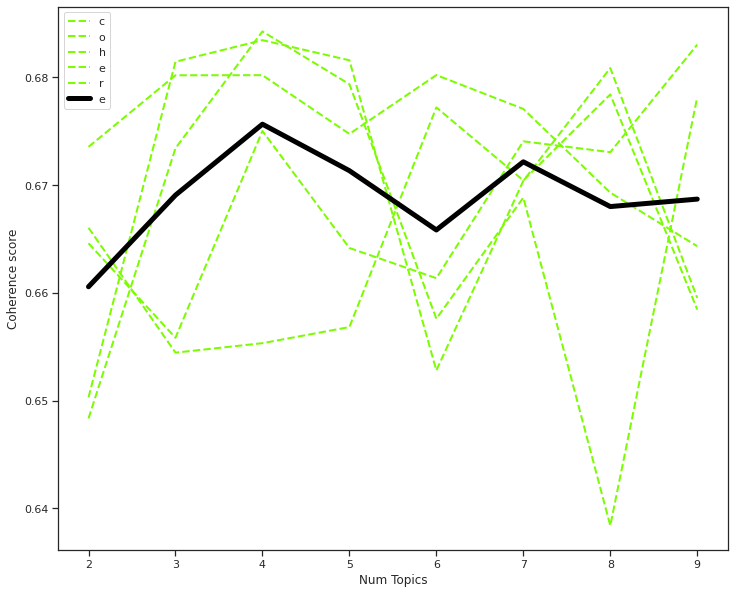

In [ ]:
# Show graph
x = range(start, limit, step)
plt.figure(figsize=(12,10))
for c in coh_t:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_t, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Untuk menentukan jumlah topik pada topic modelling, kita dapat melihat coherence score yang paling maksimum. Dapat dilihat pada grafik yang dihasilkan, jumlah topik 4 menunjukkan coherence skor maksimum. Maka, untuk analisis selanjutnya digunakan 4 topik terbaik

In [ ]:
# Membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 4 # Didapatkan dari hasil grafik diatas
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

LatentDirichletAllocation(n_components=4, random_state=0)

In [ ]:
ldamodel = gensim.models.LdaMulticore(corpus=corpus_t, id2word=id2word, \
                                      random_state=0, num_topics=n_topics)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics

(11009, 4)


array([[0.01442638, 0.01448716, 0.95646812, 0.01461834],
       [0.01423307, 0.01443207, 0.95698501, 0.01434985],
       [0.01423307, 0.01443207, 0.95698501, 0.01434985],
       ...,
       [0.03838218, 0.03697767, 0.0370623 , 0.88757785],
       [0.96346254, 0.01241877, 0.01160003, 0.01251866],
       [0.01499023, 0.17278077, 0.11422937, 0.69799963]])

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.033*"lengkapcepatberitanya_bola_sepakbola_sepakboladunia" + 0.032*"buat" + 0.022*"tim_medioker" + 0.022*"timnasmaroko" + 0.016*"pubgmobilemalaysia" + 0.013*"ibu_sri_mulyani_parkshinhye" + 0.013*"bahan" + 0.012*"kalau_kamu" + 0.011*"tahan" + 0.011*"seluruh_emas"


Topic: 1 
Words: 0.029*"duga" + 0.029*"lengkapcepatberitanya_bola_sepakbola_sepakboladunia" + 0.025*"buat" + 0.023*"timnasmaroko" + 0.012*"idola" + 0.012*"topik" + 0.011*"betul" + 0.011*"lionel" + 0.011*"brugge" + 0.011*"tahan"


Topic: 2 
Words: 0.086*"lah" + 0.046*"lionel" + 0.029*"iniesta" + 0.028*"lengkapcepatberitanya_bola_sepakbola_sepakboladunia" + 0.021*"tahan" + 0.012*"brugge" + 0.010*"kali" + 0.009*"argentina" + 0.009*"shang" + 0.008*"prankgbk"


Topic: 3 
Words: 0.063*"lengkapcepatberitanya_bola_sepakbola_sepakboladunia" + 0.026*"tahan" + 0.024*"buat" + 0.021*"timnasmaroko" + 0.018*"lionel" + 0.017*"khutbahjumat" + 0.015*"bahan" + 0.012*"leceh" + 0.011*"dominasi" + 0.011*"argentina"




Kata-kata tersebut merupakan kata kunci teratas yang berkontribusi pada masing-masing topik. Angka pada output diata menunjukkan bobot pada tiap kata. Contohnya untuk kata 'lionel' pada topic 2 memiliki bobot 0.046

Selanjutnya akan ditampilkan plot interaktif untuk melihat isi dari 4 topik yang dipilih.

In [ ]:
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.031998  0.165851       1        1  31.425177
3      0.039874 -0.118040       2        1  30.186797
1      0.135535 -0.030666       3        1  24.414624
0     -0.207407 -0.017146       4        1  13.973402, topic_info=              Term         Freq        Total Category  logprob  loglift
825      argentina  6168.000000  6168.000000  Default  30.0000  30.0000
6000         messi  3513.000000  3513.000000  Default  29.0000  29.0000
4367         juara  3689.000000  3689.000000  Default  28.0000  28.0000
5842        mbappe   982.000000   982.000000  Default  27.0000  27.0000
7452       prancis  1938.000000  1938.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
506          ajang    79.764175   134.563859   Topic4  -5.7412   1.4451
7618         qatar   229.288010  2205.770587   Topic4  -4.6853  -0.2958
1025         babak    89.275278   258.412113   Topic4  -5.6285   0.9052
7088      perancis    93.570773   380.859853   Topic4  -5.5816   0.5643
2975  fifaworldcup    80.769199   568.625856   Topic4  -5.7287   0.0164

[294 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
92         3  0.979341          1978
122        1  0.994948          2010
129        1  0.882518          2018
129        2  0.020684          2018
129        3  0.006895          2018
...      ...       ...           ...
10262      1  0.313210         world
10262      2  0.002983         world
10262      4  0.683096         world
10264      2  0.963108  worldcup2022
10264      4  0.035671  worldcup2022

[465 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

Terdapat 4 topik utama dari data perbincangan Twitter yang diambil. Karena kata kunci yang digunakan adalah mengenai Piala Dunia 2022, topik umum yang dibicarakan adalah mengenai keseluruhan Piala Dunia 2022. Namun, pada masing-masing topik terdapat fokus pembahasan yang berbeda. Sebagai contoh, pada topik 3 terdapat pembahasan mengenai Lionel Messi, Argentina yang menang sebagai juara piala dunia 2022, trofi dan beberapa juga membahas Ronaldo. Sehingga dapat disimpulkan bahwa topik 3 berisi tentang kemenangan timnas Argentina pada Piala Dunia 2022.